In [67]:
import pandas_datareader as pdr
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
print(pdr.__version__)

0.10.0


In [ ]:

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('oceans16')

In [47]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [21]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-24,62.110001,61.203999,61.844002,61.605999,25417500.0,61.605999
2017-04-25,62.796001,61.172001,61.599998,62.757999,33688500.0,62.757999
2017-04-26,62.900002,61.799999,62.473999,62.034000,23475000.0,62.034000
2017-04-27,62.618000,61.500000,62.338001,61.726002,17343000.0,61.726002
2017-04-28,62.959999,61.599998,61.966000,62.813999,22527500.0,62.813999
...,...,...,...,...,...,...
2022-04-14,1012.710022,982.190002,999.289978,985.000000,19444000.0,985.000000
2022-04-18,1014.919983,973.409973,989.030029,1004.289978,17238400.0,1004.289978
2022-04-19,1034.939941,995.330017,1005.059998,1028.150024,16615900.0,1028.150024


In [25]:
df_tesla['High'].argmax()

1143

In [28]:
df_tesla['High'].min()

37.33599853515625

In [27]:
df_tesla.iloc[530]

High         3.733600e+01
Low          3.539800e+01
Open         3.710200e+01
Close        3.579400e+01
Volume       6.532200e+07
Adj Close    3.579400e+01
Name: 2019-06-03 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

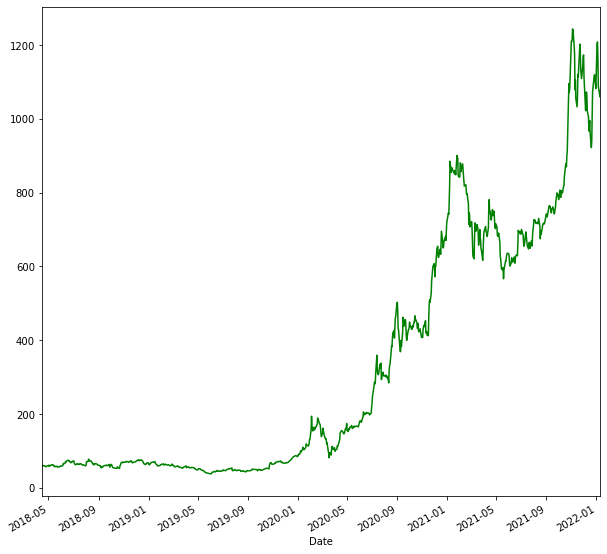

In [33]:
df_tesla['High'].plot(figsize = (10, 10), xlim = ['2018-04-15', '2022-01-10'], c = 'green' )

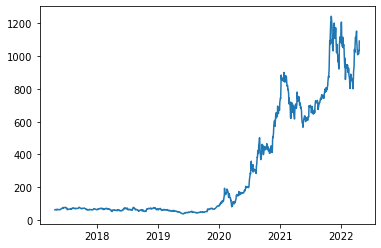

In [42]:
figure, axis = plt.subplots()

figure.title = "Just a revision"

axis.plot(df_tesla.index, df_tesla['High'])

In [48]:
df_tesla = df_tesla.reset_index()

In [65]:
pd.to_datetime(df_tesla['Date'])

0      2017-04-24
1      2017-04-25
2      2017-04-26
3      2017-04-27
4      2017-04-28
          ...    
1254   2022-04-14
1255   2022-04-18
1256   2022-04-19
1257   2022-04-20
1258   2022-04-21
Name: Date, Length: 1259, dtype: datetime64[ns]

In [66]:
df_tesla

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-04-24,62.110001,61.203999,61.844002,61.605999,25417500.0,61.605999
1,2017-04-25,62.796001,61.172001,61.599998,62.757999,33688500.0,62.757999
2,2017-04-26,62.900002,61.799999,62.473999,62.034000,23475000.0,62.034000
3,2017-04-27,62.618000,61.500000,62.338001,61.726002,17343000.0,61.726002
4,2017-04-28,62.959999,61.599998,61.966000,62.813999,22527500.0,62.813999
...,...,...,...,...,...,...,...
1254,2022-04-14,1012.710022,982.190002,999.289978,985.000000,19444000.0,985.000000
1255,2022-04-18,1014.919983,973.409973,989.030029,1004.289978,17238400.0,1004.289978
1256,2022-04-19,1034.939941,995.330017,1005.059998,1028.150024,16615900.0,1028.150024
1257,2022-04-20,1034.000000,975.250000,1030.000000,977.200012,23570400.0,977.200012


## Decomposition of Time - Series

In [68]:
current_data = df_tesla['High']

<AxesSubplot:>

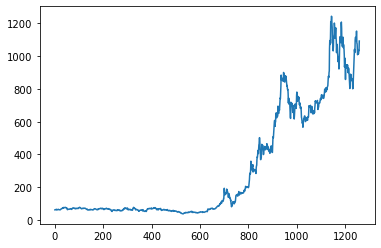

In [69]:
current_data.plot()

## So from the above plot, we can able to see the upward trends over the time 

In [80]:
# Two methods for the decomposition of time-series, one is multiplicative decomposition and another one is 
# additive time-series
mul_decom = seasonal_decompose(current_data, model = 'multiplication', period = 1)
add_decom = seasonal_decompose(current_data, model = 'addition', period = 1)

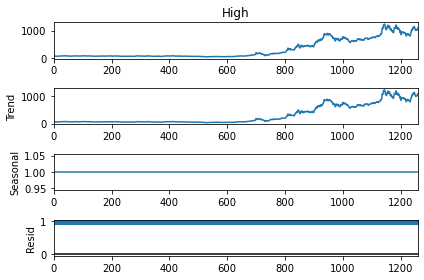

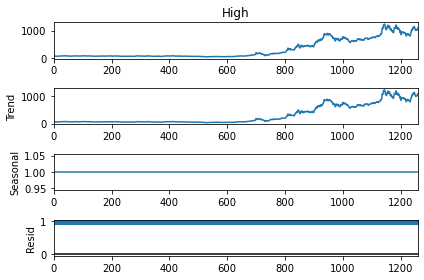

In [77]:
mul_decom.plot()

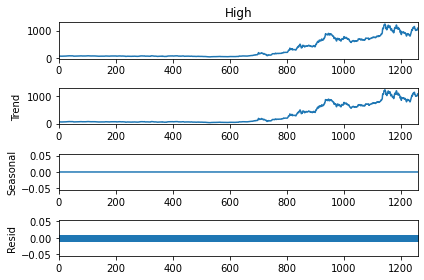

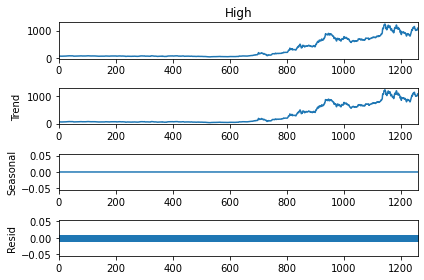

In [78]:
add_decom.plot()

In [83]:
add_df = pd.concat([add_decom.seasonal, add_decom.trend, add_decom.resid], axis = 1)

In [84]:
# 0 - seasonality and 0 - errors --- which means there is no seasonality and no errors
add_df

,seasonal,trend,resid
0,0.0,62.110001,0.0
1,0.0,62.796001,0.0
2,0.0,62.900002,0.0
3,0.0,62.618000,0.0
4,0.0,62.959999,0.0
...,...,...,...
1254,0.0,1012.710022,0.0
1255,0.0,1014.919983,0.0
1256,0.0,1034.939941,0.0
1257,0.0,1034.000000,0.0


In [85]:
multi_df = pd.concat([mul_decom.seasonal, mul_decom.trend, mul_decom.resid], axis = 1)

In [86]:
# 1 - seasonality, 1 - error ---> which means there is no seasonality
multi_df

,seasonal,trend,resid
0,1.0,62.110001,1.0
1,1.0,62.796001,1.0
2,1.0,62.900002,1.0
3,1.0,62.618000,1.0
4,1.0,62.959999,1.0
...,...,...,...
1254,1.0,1012.710022,1.0
1255,1.0,1014.919983,1.0
1256,1.0,1034.939941,1.0
1257,1.0,1034.000000,1.0


In [88]:
# Stationarity test using Augmented Ducky Fuller Test 

from statsmodels.tsa.stattools import adfuller

# Null hypothesis is Not stationary, Alternate Hypothesis is Stationary
# if we wanted to reject the null hypothesis, our p-value should be lesser than significance value or alpha value

adfuller_test = adfuller(current_data, autolag = 'AIC')

In [94]:
p_value = adfuller_test[1]

if p_value < 0.5 :
    print("Stationarity successfull")
else :
    print("Not a Stationarity")

Not a Stationarity


In [96]:
# If a time-series is not a Stationary, then we cannot able to build a model with that series
# So we need to change the non-stationary time series to stationary time-series
# For this we can use many different methods, one of the method is rolling stats